## Grafs 22/23 - Sheet 3 - Due 4 November 2022


# Bipartite graphs, trees and search 


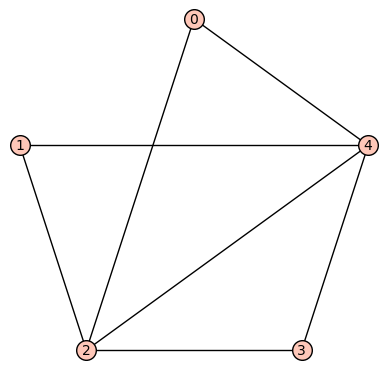

In [1]:
G=graphs.CompleteGraph(5)
G.delete_edges([(0,1),(0,3),(1,3)])
G.show()


## Exercise 1

Write your own breath first search algorith. The function `BFS(G,v)` should return the tree `T` (as a sage Graph) obtained by performing the breath first search on the graph `G` with root `v`, as well as a list `L` that records the order in which the vertices are visited. You might use a python `set` to store the visited vertices. You can use a `list` and `pop(0)` to model a first in first out queue.

In [2]:
A=set([1,2,3])

print(A)

A.add(4)

print(A)

if 3 in A:
    print('A contains 3')
else:
    print('A does not contain 3')
    
if 5 in A:
    print('A contains 5')
else:
    print('A does not contain 5')


{1, 2, 3}
{1, 2, 3, 4}
A contains 3
A does not contain 5


In [3]:
L=list([1,2,3,4,5])
print(L)
L.pop(0)
print(L)
L.append(6)
print(L)
L.pop(0)
print(L)

[1, 2, 3, 4, 5]
[2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6]


In [4]:
def BFS(G,v):
    T=Graph()
    #This Graph will contain the spanning tree
    L=[]
    #This list will contain the vertices in the order they are visited
    q=[]
    
    q.append(v)
    L.append(v)
    
    while q:
        visited= q.pop(0)
        for n in G[visited]:
            if n not in L:
                L.append(n)
                q.append(n)
                T.add_edge(n,visited)
        
        
    return (T,L)
    

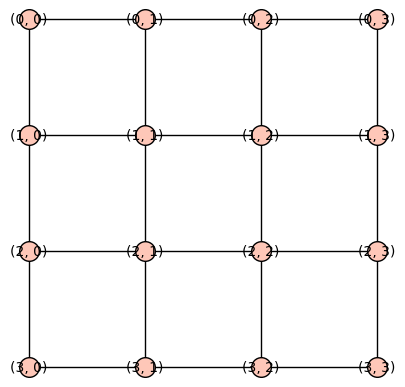

[(0, 0), (0, 1), (1, 0), (0, 2), (1, 1), (2, 0), (0, 3), (1, 2), (2, 1), (3, 0), (1, 3), (2, 2), (3, 1), (2, 3), (3, 2), (3, 3)]


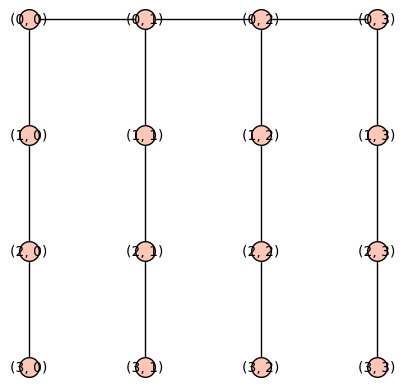

In [5]:
Gr=graphs.Grid2dGraph(4,4)
Gr.plot(save_pos=True).show()
pos=Gr.get_pos()
v=Gr.vertices()[0]
print(BFS(Gr,v)[1])
H=BFS(Gr,v)[0]
H.plot(pos=pos).show()


## Exercice 2

Write a function `connected_components(G)` that uses BFS to compute the connected components of a graph `G`. It should return a list of connected components (as sets of vertices).

In [6]:
def connected_components(G):

    CC=[]
    #this list will contain the connected components of G

    for v in G.vertices():
        V=set()
        V.add(v)
        for n in G[v]:
            if n not in V:
                V.add(n)
        if V not in CC:
            CC.append(V)
    
    return CC
                    

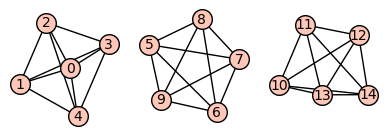

[{0, 1, 2, 3, 4}, {5, 6, 7, 8, 9}, {10, 11, 12, 13, 14}]

In [7]:
G1=graphs.CompleteGraph(5)
G1.relabel(range(5))
G2=graphs.CompleteGraph(5)
G2.relabel(range(5,10))
G3=graphs.CompleteGraph(5)
G3.relabel(range(10,15))
DG=G1.union(G2).union(G3)
DG.show()

connected_components(DG)

## Exercice 3
Write a function `distance(G,v)` that adapts the BFS algorithm to return a list containing the length of the shortest path between the vertices `v` and `w` for each vertex `w`. If these vertices are not connected then the algorithm should return 'Infinity'. (You need to import this via `from sage.rings.infinity import Infinity`). You can assume that the vertices of the graph `G` are the integers between `0` and some number `n`.



In [8]:
from sage.rings.infinity import Infinity

def distance(G,v):
    dist=[Infinity for i in range(G.order())]
    dist[v]=0
    #dist will contain the distances of all the vertices to v
    
    L=[v]
    q=[v]
    
    while q:
        visited = q.pop(0)
        for u in G[visited]:
            if u not in L:
                q.append(u)
                L.append(u)
                dist[u]=dist[visited]+1

    return dist
    

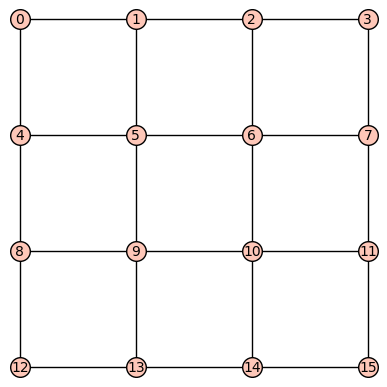

[0, 1, 2, 3, 1, 2, 3, 4, 2, 3, 4, 5, 3, 4, 5, 6]

In [9]:
Gr.relabel()
Gr.show()
distance(Gr,0)

{(0, 1, 0): [], (1/6, 5/6, 0): [], (1/3, 2/3, 0): [], (1/2, 1/2, 0): [], (2/3, 1/3, 0): [], (5/6, 1/6, 0): [], (1, 0, 0): []}


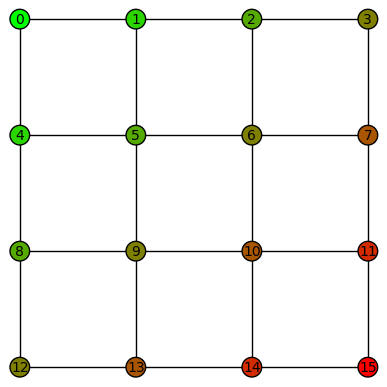

In [10]:
dists=distance(Gr,0)
diam =max(dists)

vertex_colors={}
for i in range(diam+1):
    vertex_colors[(i/diam,1-i/diam,0)]=[]

print(vertex_colors)

for v in Gr.vertices():
    vertex_colors[(dists[v]/diam,1-dists[v]/diam,0)].append(v)
    
pl=Gr.plot(vertex_colors=vertex_colors)
pl.show()

{(0, 1, 0): [], (1/4, 3/4, 0): [], (1/2, 1/2, 0): [], (3/4, 1/4, 0): [], (1, 0, 0): []}


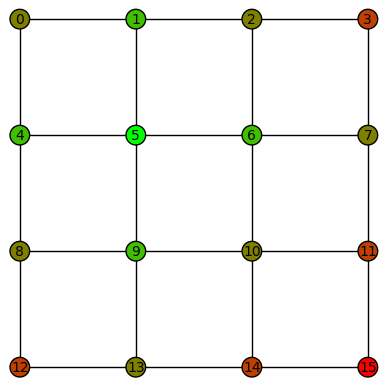

In [11]:
dists=distance(Gr,5)
diam =max(dists)

vertex_colors={}
for i in range(diam+1):
    vertex_colors[(i/diam,1-i/diam,0)]=[]

print(vertex_colors)

for v in Gr.vertices():
    vertex_colors[(dists[v]/diam,1-dists[v]/diam,0)].append(v)
    
pl=Gr.plot(vertex_colors=vertex_colors)
pl.show()

In [12]:
UG=Graph([[1,2],[3,4]])
distance(UG,1)

[+Infinity, 0, 1, +Infinity]

## Exercice 4

The _girth_ $g(G)$ of a graph $G$ is the length of a shortest cycle contained in $G$. 
Write a function `edge_girth(G,e)` that computes the length of a shortest cycle in `G` containing the edge `e`. (Hint: a shortest cycle using $e$ is composed of $e$ and a shortest path between its endpoints in $G\setminus e$.) 
If there is no cycle using this edge, the function should return `Infinity`. 

Write a function `girth(G)` that computes the girth of the graph `G`. 


In [13]:
def edge_girth(G,e):
    
    G1=G.copy()
    G1.delete_edge(e)
        
    return distance(G1,e[0])[e[1]]+1
   
    



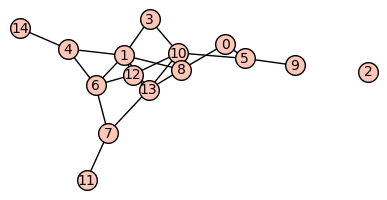

(0, 5, None)


5

In [14]:
G=graphs.RandomGNP(15,.25)
G.show()
print(G.edges()[0])
edge_girth(G, G.edges()[0])


In [15]:
P=graphs.PathGraph(4)
edge_girth(P,(1,2))

+Infinity

In [16]:
from sage.rings.infinity import Infinity
def girth(G):
    g= +Infinity
    for e in G.edges():
        g1=edge_girth(G,e)
        if g1<g:
            g=g1
        
    
    return g
    

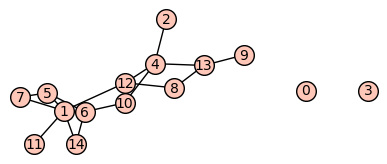

3

In [17]:
RG=graphs.RandomGNP(15,.18)

RG.show()

girth(RG)

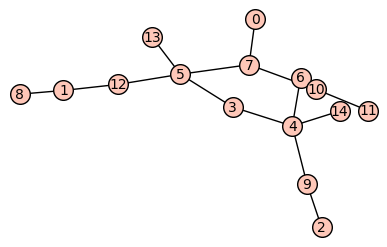

+Infinity

In [18]:
RT=graphs.RandomTree(15)

RT.show()

girth(RT)

## Exercise 5

Write your own depth first search algorith. The function `DFS(G,v)` should return the tree `T` (as a sage `Graph`) obtained by performing the depth first search on the graph `G` with root `v`, as well as a list `L` containing the vertices in the order in which they are visited by your DFS algorithm.


In [19]:
def rec_DFS(G,v,T,L):
    for u in G[v]:
        if u not in L:
            L.append(u)
            T.add_edge(v,u)
            rec_DFS(G,u,T,L)
    return

def DFS(G,v):
    T=Graph()
    #This Graph will contain the spanning tree
    L=[]
    #This list will contain the vertices in the order they are visited
    L.append(v)
    rec_DFS(G,v,T,L)
    
    return (T,L)


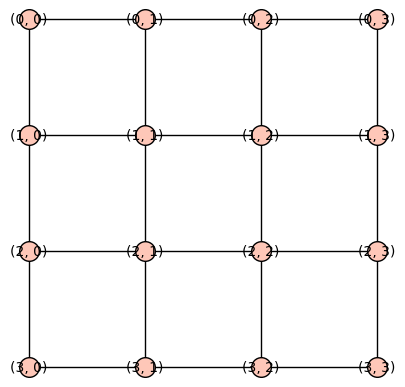

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 2), (1, 1), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 2), (3, 1), (3, 0)]


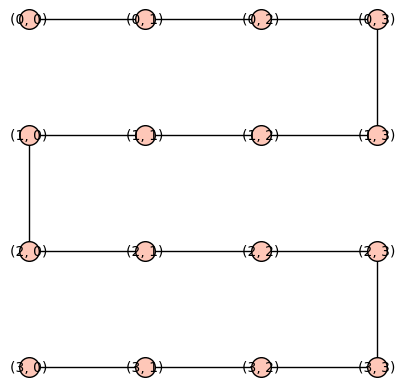

In [20]:
Gr=graphs.Grid2dGraph(4,4)
Gr.plot(save_pos=True).show()
pos=Gr.get_pos()
v=Gr.vertices()[0]
print(DFS(Gr,v)[1])
H=DFS(Gr,v)[0]
H.plot(pos=pos).show()

## Exercice 6

Write a function `is_bipartite(G,bipartition=False)` that uses DFS or BFS to test whether a graph is bipartite. If `bipartition=False` the function should return a boolean `True` or `False`. If `bipartition=True`, then the function should return a pair `(b,P)`: if `G` is bipartite then `b=True` and `P=(A,B)` where `A` and `B` are a bipartition of the vertices, if `G` is not bipartite then `b=False` and `P=()`.

In [21]:
def is_bipartite(G, bipartition=False):
    bipartite=True
    #Bolean that will state whether G is bipartite
    P=(set(),set())
    #This will contain a bipartition if the graph is bipartite
    v=G.vertices()[0] #any vertex
    q=[] #queue
    l=[] #visited list
    l.append(v)
    q.append(v)
    P[0].add(v)
    while q:
        w=q.pop(0)
        for u in G[w]:
            if u not in l:
                q.append(u)
                l.append(u)
                if w in P[0] and u not in P[0]:
                    P[1].add(u)
                elif w in P[1] and u not in P[1]:
                    P[0].add(u)
                else:
                    bipartite=False
                    P=()
                    break
            
    

    if bipartition:
        return (bipartite,P)
    else:
        return bipartite
    

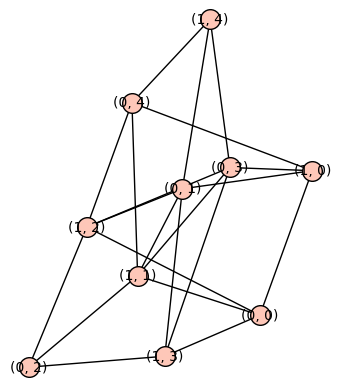

(True, ({(0, 1), (0, 4), (0, 0), (0, 3), (0, 2)}, {(1, 2), (1, 1), (1, 4), (1, 0), (1, 3)}))


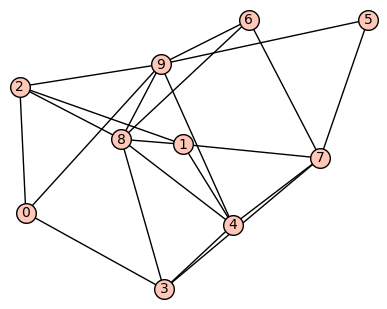

(True, ({0, 1, 4, 5, 6, 7, 8}, {9, 2, 3}))


In [22]:
RB=graphs.RandomBipartite(5,5,.8)
RB.show()
print(is_bipartite(RB,bipartition=True))
RG=graphs.RandomGNM(10,RB.size())
RG.show()
print(is_bipartite(RG,bipartition=True))

## Exercise 7

Turn the the proof of the theorem from the lecture stating that every loopless graph $G$ with $m$ edges contains bipartite subgraph $H$ with at least $\frac{m}{2}$ edges into a function `large_bipartite(G)` that returns a bipartite subgraph of `G` containing at least half its edges.

In [23]:
def large_bipartite2(G):
    A=set()
    B=set()
    #We create a bipartition
    for i in range(0,G.order()):
        if i<= G.order()//2:
            A.add(G.vertices()[i])
        else:
            B.add(G.vertices()[i])
    #Subgraph initialization
    H=Graph()
    for v in A:
        for u in G[v]:
            if u in B:
                H.add_edge(u,v)
    
    #Algorithm iterations (switching vertices if necessary) while E(H)<E(G)/2
    while 2*H.size()< G.size():
        for v in G.vertices():
                vA=len(set(G[v]).intersection(A))
                vB=len(set(G[v]).intersection(B))
                if v in A and vA>vB:
                    A.remove(v)
                    B.add(v)
                elif v in B and vB>vA:
                    B.remove(v)
                    A.add(v)
        H=Graph()
        for v in A:
            for u in G[v]:
                if u in B:
                    H.add_edge(u,v)

    return H

Is G bipartite? False


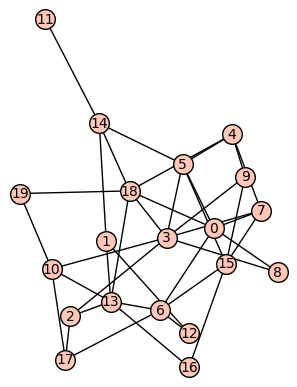

Is H bipartite? True
Does it have at least half of G edges? True


In [24]:
G=graphs.RandomGNP(20,.25)
print("Is G bipartite?", G.is_bipartite())
H=large_bipartite2(G)
H.show()
print("Is H bipartite?",H.is_bipartite())
print("Does it have at least half of G edges?", 2*H.num_edges()>=G.num_edges())